# Before you begin

## Update your course repository

You need to clone the course repository to Nova. You probably already have cloned this, so you can skip this step.

```bash
git clone git@github.com:EEOB-BioData/BCB546_Spring2024.git
```

You will still need to pull new changes to this repository at the beginning of class. This will enable you to access new data files and scripts needed for in-class activities.

```bash
cd BCB546_Spring2024
git pull
```

Note that if you have modified any files in the repository, you will need to commit those changes before you can pull new changes. If you don't care about the changes, just delete and re-clone the repository.

## Start Jupyter notebook on Nova on demand.

You can start Jupyter notebook on Nova on demand. This will allow you to run Jupyter notebook on the server and access it from your local machine.

1. Go to the [Nova OnDemand](https://nova-ondemand.its.iastate.edu/) and login
2. Under the "Interactive Apps" tab, click on "Jupyter Notebook", request desired resources and click "Launch"
3. Wait for the job to start and click on the "Connect to Jupyter" button


# Getting Started

For this short exercise, we will be using the `pandas` library in Python to manipulate a GFF3 file.
GFF3 is a file format used for storing genomic features in a plain text format. It is a tab-delimited file that describes the features of a genome assembly. Each line in the file represents a feature, such as a gene, exon, or CDS. These features can be nested, eg: CDS, and exons are within the mRNA feature, mRNA is within the gene feature. 
The file is divided into nine columns (usually referred as attributes column), will contain feature specific information and is not standardized. The first eight columns are mandatory and are as follows:

1. `seqid`: chromosome or scaffold the feature is located.  
2. `source`: Source of the feature, eg: a database or tool that generated the feature.
3. `type`: feature type, eg: `gene`, `mRNA`, `CDS`, `exon` etc.
4. `start`: genomic start position of the feature.
5. `end`: genomic end position of the feature.
6. `score`: Feature score, can be a floating-point number, missing is represented by "`.`".
7. `strand`: strand of the feature, can be + or -, missing is represented by "`.`".
8. `phase`: usually for `CDS` feature, and can be `0`, `1`, or `2`. missing is represented by "`.`".
9. `attributes`: a semicolon-separated list of tag-value pairs, where the tag and value are separated by `=`. The tag-value pairs are feature specific.



## Importing the required libraries

We will be using the `pandas` library to read and manipulate the GFF3 file. We will also use the `os` library to check if the file exists. Later for plotting, we will also use the `seaborn` library. And one specific function from `matplotlib` library to save the plots.


In [1]:
import pandas as pd
import os
import seaborn as sns 
import matplotlib.pyplot as plt

## Download the GFF3 files

We will use maize annotation file for B73 downloaded from MaizeGDB for this tutorial. The file is loacted [here](https://download.maizegdb.org/Zm-B73-REFERENCE-NAM-5.0/) but it has been pre-downloaded to the working directory. 

The file name is `Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz` 

These are unix commands and you can simply prefix `!` to run them on Jupyter notebook.

### in bash (note the exclamation point in front of standard commands)


In [2]:
!wget https://download.maizegdb.org/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz
!gunzip Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz

--2024-04-13 12:01:32--  https://download.maizegdb.org/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz
Resolving download.maizegdb.org (download.maizegdb.org)... 104.26.10.112, 172.67.74.80, 104.26.11.112, ...
Connecting to download.maizegdb.org (download.maizegdb.org)|104.26.10.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12251264 (12M) [application/x-gzip]
Saving to: ‘Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz’

Zm-B73-REFERENCE-NA 100%[===================>]  11.68M  75.8MB/s    in 0.2s    

2024-04-13 12:01:32 (75.8 MB/s) - ‘Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz’ saved [12251264/12251264]



**Note**: If you rerun this cell, you will likely get an error since the file already exists in the directory. Be sure to either delete or skip this cell when rerunning.

## Reading the GFF3 file

We will use the `pd.read_csv` function to read the GFF3 file. Since the file is tab-delimited, we will use the `sep` argument to specify the delimiter. We will also use the `comment` argument to skip the header lines in the file. 



In [3]:
gff3_file = "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3"
columns = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
gff3_df = pd.read_csv(gff3_file, sep='\t', comment='#', header=None, names=columns)

with `os` library, you can check if the file exists before reading it.

In [4]:
if os.path.exists(gff3_file):
    gff3_df = pd.read_csv(gff3_file, sep='\t', comment='#', header=None, names=columns)
else:
    print(f"{gff3_file} does not exist")

## 1. Explore the data

Let's take a look at the first few rows of the dataframe to understand the structure of the data.


In [5]:
gff3_df.head()

,seqid,source,type,start,end,score,strand,phase,attributes
0,chr1,assembly,chromosome,1,308452471,.,.,.,ID=1;Name=chromosome:Zm-B73-REFERENCE-NAM-5.0:...
1,chr1,NAM,gene,34617,40204,.,+,.,ID=Zm00001eb000010;biotype=protein_coding;logi...
2,chr1,NAM,mRNA,34617,40204,.,+,.,ID=Zm00001eb000010_T001;Parent=Zm00001eb000010...
3,chr1,NAM,five_prime_UTR,34617,34721,.,+,.,Parent=Zm00001eb000010_T001
4,chr1,NAM,exon,34617,35318,.,+,.,Parent=Zm00001eb000010_T001;Name=Zm00001eb0000...


and the last few rows

In [6]:
gff3_df.tail()

,seqid,source,type,start,end,score,strand,phase,attributes
1143798,scaf_695,NAM,mRNA,2336,4226,.,-,.,ID=Zm00001eb443030_T001;Parent=Zm00001eb443030...
1143799,scaf_695,NAM,five_prime_UTR,4218,4226,.,-,.,Parent=Zm00001eb443030_T001
1143800,scaf_695,NAM,exon,2336,4226,.,-,.,Parent=Zm00001eb443030_T001;Name=Zm00001eb4430...
1143801,scaf_695,NAM,CDS,2898,4217,.,-,0,ID=Zm00001eb443030_P001;Parent=Zm00001eb443030...
1143802,scaf_695,NAM,three_prime_UTR,2336,2897,.,-,.,Parent=Zm00001eb443030_T001


To examine the columns and the type of object they are assigned to, we can use the info method.


In [7]:
gff3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143803 entries, 0 to 1143802
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   seqid       1143803 non-null  object
 1   source      1143803 non-null  object
 2   type        1143803 non-null  object
 3   start       1143803 non-null  int64 
 4   end         1143803 non-null  int64 
 5   score       1143803 non-null  object
 6   strand      1143803 non-null  object
 7   phase       1143803 non-null  object
 8   attributes  1143803 non-null  object
dtypes: int64(2), object(7)
memory usage: 78.5+ MB


Let's see the unique values in the `type` column. These are the features in the GFF3 file.


In [8]:
gff3_df['type'].unique()

array(['chromosome', 'gene', 'mRNA', 'five_prime_UTR', 'exon', 'CDS',
       'three_prime_UTR', 'scaffold'], dtype=object)

We can also see what the unique values in the `seqid` column are.


In [9]:
gff3_df['seqid'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'scaf_22', 'scaf_23', 'scaf_30', 'scaf_32',
       'scaf_33', 'scaf_34', 'scaf_36', 'scaf_37', 'scaf_45', 'scaf_48',
       'scaf_49', 'scaf_54', 'scaf_56', 'scaf_61', 'scaf_66', 'scaf_67',
       'scaf_72', 'scaf_77', 'scaf_82', 'scaf_87', 'scaf_88', 'scaf_94',
       'scaf_100', 'scaf_103', 'scaf_106', 'scaf_107', 'scaf_110',
       'scaf_113', 'scaf_114', 'scaf_126', 'scaf_136', 'scaf_138',
       'scaf_139', 'scaf_143', 'scaf_146', 'scaf_153', 'scaf_155',
       'scaf_158', 'scaf_160', 'scaf_161', 'scaf_173', 'scaf_174',
       'scaf_178', 'scaf_179', 'scaf_181', 'scaf_183', 'scaf_186',
       'scaf_187', 'scaf_190', 'scaf_191', 'scaf_194', 'scaf_196',
       'scaf_198', 'scaf_200', 'scaf_203', 'scaf_209', 'scaf_210',
       'scaf_212', 'scaf_214', 'scaf_219', 'scaf_221', 'scaf_222',
       'scaf_223', 'scaf_224', 'scaf_228', 'scaf_229', 'scaf_231',
       'scaf_232', 'scaf_235', 'scaf_23

It looks like the GFF3 file has annotations for chromsomes and scaffolds. 


## 2. Filtering the data

Since we are interested in the chr features only, we can filter the dataframe to include `seqid` column that have a match to `chr`.


In [10]:
filter = gff3_df['seqid'].str.contains('chr')
chr_gff3_df = gff3_df[filter]

Check the output

In [11]:
chr_gff3_df.head()

,seqid,source,type,start,end,score,strand,phase,attributes
0,chr1,assembly,chromosome,1,308452471,.,.,.,ID=1;Name=chromosome:Zm-B73-REFERENCE-NAM-5.0:...
1,chr1,NAM,gene,34617,40204,.,+,.,ID=Zm00001eb000010;biotype=protein_coding;logi...
2,chr1,NAM,mRNA,34617,40204,.,+,.,ID=Zm00001eb000010_T001;Parent=Zm00001eb000010...
3,chr1,NAM,five_prime_UTR,34617,34721,.,+,.,Parent=Zm00001eb000010_T001
4,chr1,NAM,exon,34617,35318,.,+,.,Parent=Zm00001eb000010_T001;Name=Zm00001eb0000...


In [12]:
chr_gff3_df.tail()

,seqid,source,type,start,end,score,strand,phase,attributes
1138113,chr10,NAM,exon,152286718,152287382,.,-,.,Parent=Zm00001eb434590_T001;Name=Zm00001eb4345...
1138114,chr10,NAM,CDS,152285016,152286200,.,-,0,ID=Zm00001eb434590_P001;Parent=Zm00001eb434590...
1138115,chr10,NAM,CDS,152286281,152286588,.,-,2,ID=Zm00001eb434590_P001;Parent=Zm00001eb434590...
1138116,chr10,NAM,CDS,152286718,152287096,.,-,0,ID=Zm00001eb434590_P001;Parent=Zm00001eb434590...
1138117,chr10,NAM,three_prime_UTR,152284763,152285015,.,-,.,Parent=Zm00001eb434590_T001


Does the output look as expected?

Other common filters include filtering by feature type. For example, to filter only the `gene` features, we can use the following code.

In [13]:
filter = chr_gff3_df['type'] == 'gene'
gene_df = chr_gff3_df[filter]

same can be done for `mRNA`, `CDS`, `exon` features as well.

## 3. Format conversion

A common task in bioinformatics is format conversion. We frequently need convert files from one format to another. 
The genomic coordinates in GFF3 files are 1-based, but other formats, such as [BED file format](https://useast.ensembl.org/info/website/upload/bed.html), is 0-based coordinates.

![zero-based-and-one-based-coordinates](https://github.com/EEOB-BioData/BCB546_Spring2024/assets/4835524/17f19f18-06e0-442a-b5b5-d4cd285c4fdc)

source: [biostars.org](https://www.biostars.org/p/84686/)

We will extract only `mRNA` features from the GFF3 file and convert the coordinates to 0-based and save it as a bed file.


In [14]:
filter = chr_gff3_df['type'] == 'mRNA'
mRNA_df = chr_gff3_df[filter]
mRNA_df

,seqid,source,type,start,end,score,strand,phase,attributes
2,chr1,NAM,mRNA,34617,40204,.,+,.,ID=Zm00001eb000010_T001;Parent=Zm00001eb000010...
24,chr1,NAM,mRNA,41263,46050,.,-,.,ID=Zm00001eb000020_T002;Parent=Zm00001eb000020...
43,chr1,NAM,mRNA,41214,43902,.,-,.,ID=Zm00001eb000020_T004;Parent=Zm00001eb000020...
62,chr1,NAM,mRNA,41314,46039,.,-,.,ID=Zm00001eb000020_T003;Parent=Zm00001eb000020...
85,chr1,NAM,mRNA,41214,46762,.,-,.,ID=Zm00001eb000020_T001;Parent=Zm00001eb000020...
...,...,...,...,...,...,...,...,...,...
1138073,chr10,NAM,mRNA,152010430,152012584,.,-,.,ID=Zm00001eb434550_T001;Parent=Zm00001eb434550...
1138079,chr10,NAM,mRNA,152012893,152015823,.,-,.,ID=Zm00001eb434560_T001;Parent=Zm00001eb434560...
1138095,chr10,NAM,mRNA,152200925,152201511,.,+,.,ID=Zm00001eb434570_T001;Parent=Zm00001eb434570...
1138101,chr10,NAM,mRNA,152280251,152282615,.,+,.,ID=Zm00001eb434580_T001;Parent=Zm00001eb434580...


select the columns we need


In [15]:
mRNA_df = mRNA_df[['seqid', 'start', 'end', 'attributes', 'score', 'strand']]
mRNA_df

,seqid,start,end,attributes,score,strand
2,chr1,34617,40204,ID=Zm00001eb000010_T001;Parent=Zm00001eb000010...,.,+
24,chr1,41263,46050,ID=Zm00001eb000020_T002;Parent=Zm00001eb000020...,.,-
43,chr1,41214,43902,ID=Zm00001eb000020_T004;Parent=Zm00001eb000020...,.,-
62,chr1,41314,46039,ID=Zm00001eb000020_T003;Parent=Zm00001eb000020...,.,-
85,chr1,41214,46762,ID=Zm00001eb000020_T001;Parent=Zm00001eb000020...,.,-
...,...,...,...,...,...,...
1138073,chr10,152010430,152012584,ID=Zm00001eb434550_T001;Parent=Zm00001eb434550...,.,-
1138079,chr10,152012893,152015823,ID=Zm00001eb434560_T001;Parent=Zm00001eb434560...,.,-
1138095,chr10,152200925,152201511,ID=Zm00001eb434570_T001;Parent=Zm00001eb434570...,.,+
1138101,chr10,152280251,152282615,ID=Zm00001eb434580_T001;Parent=Zm00001eb434580...,.,+


For the attribute column, we only need the first attribute which is the ID of the mRNA feature. We will extract this information and add it as a new column in the dataframe.


In [16]:
mRNA_df['mRNA_id'] = mRNA_df['attributes'].str.split(';', expand=True)[0].str.split('=', expand=True)[1]
#mRNA_df.loc[:, 'mRNA_id'] = mRNA_df['attributes'].str.split(';', expand=True)[0].str.split('=', expand=True)[1]
mRNA_df

/mnt/job-temp/arnstrm/5146429/ipykernel_842960/3649785668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mRNA_df['mRNA_id'] = mRNA_df['attributes'].str.split(';', expand=True)[0].str.split('=', expand=True)[1]


,seqid,start,end,attributes,score,strand,mRNA_id
2,chr1,34617,40204,ID=Zm00001eb000010_T001;Parent=Zm00001eb000010...,.,+,Zm00001eb000010_T001
24,chr1,41263,46050,ID=Zm00001eb000020_T002;Parent=Zm00001eb000020...,.,-,Zm00001eb000020_T002
43,chr1,41214,43902,ID=Zm00001eb000020_T004;Parent=Zm00001eb000020...,.,-,Zm00001eb000020_T004
62,chr1,41314,46039,ID=Zm00001eb000020_T003;Parent=Zm00001eb000020...,.,-,Zm00001eb000020_T003
85,chr1,41214,46762,ID=Zm00001eb000020_T001;Parent=Zm00001eb000020...,.,-,Zm00001eb000020_T001
...,...,...,...,...,...,...,...
1138073,chr10,152010430,152012584,ID=Zm00001eb434550_T001;Parent=Zm00001eb434550...,.,-,Zm00001eb434550_T001
1138079,chr10,152012893,152015823,ID=Zm00001eb434560_T001;Parent=Zm00001eb434560...,.,-,Zm00001eb434560_T001
1138095,chr10,152200925,152201511,ID=Zm00001eb434570_T001;Parent=Zm00001eb434570...,.,+,Zm00001eb434570_T001
1138101,chr10,152280251,152282615,ID=Zm00001eb434580_T001;Parent=Zm00001eb434580...,.,+,Zm00001eb434580_T001


rearrange the columns


In [17]:
mRNA_df = mRNA_df[['seqid', 'start', 'end', 'mRNA_id', 'score', 'strand']]
mRNA_df

,seqid,start,end,mRNA_id,score,strand
2,chr1,34617,40204,Zm00001eb000010_T001,.,+
24,chr1,41263,46050,Zm00001eb000020_T002,.,-
43,chr1,41214,43902,Zm00001eb000020_T004,.,-
62,chr1,41314,46039,Zm00001eb000020_T003,.,-
85,chr1,41214,46762,Zm00001eb000020_T001,.,-
...,...,...,...,...,...,...
1138073,chr10,152010430,152012584,Zm00001eb434550_T001,.,-
1138079,chr10,152012893,152015823,Zm00001eb434560_T001,.,-
1138095,chr10,152200925,152201511,Zm00001eb434570_T001,.,+
1138101,chr10,152280251,152282615,Zm00001eb434580_T001,.,+


Now we will convert the start position to 0-based by subtracting 1 from the start position.


In [18]:
mRNA_df['start'] = mRNA_df['start'] - 1
mRNA_df

/mnt/job-temp/arnstrm/5146429/ipykernel_842960/3365232138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mRNA_df['start'] = mRNA_df['start'] - 1


,seqid,start,end,mRNA_id,score,strand
2,chr1,34616,40204,Zm00001eb000010_T001,.,+
24,chr1,41262,46050,Zm00001eb000020_T002,.,-
43,chr1,41213,43902,Zm00001eb000020_T004,.,-
62,chr1,41313,46039,Zm00001eb000020_T003,.,-
85,chr1,41213,46762,Zm00001eb000020_T001,.,-
...,...,...,...,...,...,...
1138073,chr10,152010429,152012584,Zm00001eb434550_T001,.,-
1138079,chr10,152012892,152015823,Zm00001eb434560_T001,.,-
1138095,chr10,152200924,152201511,Zm00001eb434570_T001,.,+
1138101,chr10,152280250,152282615,Zm00001eb434580_T001,.,+


Finally, we will save the dataframe as a bed file.


In [19]:
mRNA_df.to_csv('B73v5_mRNA.bed', sep='\t', index=False, header=False)

Congratulations! You have successfully converted a GFF3 file to a BED file!


## 4. Summary Statistics

Another interesting task is to calculate summary statistics of various features in your GFF3 file. We can calculate the length of each feature by subtracting the start position from the end position (since it is 0-based).


In [20]:
chr_gff3_df['feature_length'] = chr_gff3_df['end'] - chr_gff3_df['start']
# chr_gff3_df.loc[:, 'feature_length'] = chr_gff3_df['end'] - chr_gff3_df['start'] # better way

/mnt/job-temp/arnstrm/5146429/ipykernel_842960/3516859215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chr_gff3_df['feature_length'] = chr_gff3_df['end'] - chr_gff3_df['start']


Total sum of gene feature lengths

In [21]:
chr_gff3_df[chr_gff3_df['type'] == 'gene']['feature_length'].sum()

176074616

This is the total length of all the genes in the GFF3 file. For a genome of 2.4Gb, this is a very small fraction of the genome. 


Using the `groupby` method, we can calculate various summary statistics for each feature type.


In [22]:
chr_gff3_df.groupby('type')['feature_length'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])

,count,mean,median,min,max,std
type,,,,,,
CDS,401806,2.156939e+02,121.0,0,9095,3.014736e+02
chromosome,10,2.131847e+08,206081181.5,152435370,308452470,4.841196e+07
exon,450442,2.899984e+02,147.0,0,10978,3.813191e+02
five_prime_UTR,93346,1.974762e+02,144.0,0,4010,2.005234e+02
gene,39035,4.510686e+03,2715.0,212,751400,8.883022e+03
mRNA,71791,5.404865e+03,3577.0,212,745091,8.351370e+03
three_prime_UTR,81688,3.109432e+02,273.0,0,4893,2.551815e+02



change display options to show the values correctly

In [23]:
pd.options.display.float_format = '{:,.2f}'.format

In [24]:
chr_gff3_df.groupby('type')['feature_length'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])

,count,mean,median,min,max,std
type,,,,,,
CDS,401806,215.69,121.00,0,9095,301.47
chromosome,10,"213,184,679.50","206,081,181.50",152435370,308452470,"48,411,960.37"
exon,450442,290.00,147.00,0,10978,381.32
five_prime_UTR,93346,197.48,144.00,0,4010,200.52
gene,39035,"4,510.69","2,715.00",212,751400,"8,883.02"
mRNA,71791,"5,404.86","3,577.00",212,745091,"8,351.37"
three_prime_UTR,81688,310.94,273.00,0,4893,255.18


To save them as a csv file, we can use the `to_csv` method.

In [25]:
summary_stats = chr_gff3_df.groupby('type')['feature_length'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
summary_stats.to_csv('summary_stats.csv')


Also, if you want a specific feature stats, you can also do this:


In [26]:
filter = chr_gff3_df['type'] == 'gene'
gene_df = chr_gff3_df[filter]
gene_df['feature_length'].describe()

count    39,035.00
mean      4,510.69
std       8,883.02
min         212.00
25%       1,239.00
50%       2,715.00
75%       5,059.00
max     751,400.00
Name: feature_length, dtype: float64

This will give you the summary statistics for the gene features only.



## 5. Visualizations


Generating count plots is a great way to visualize the distribution of features in your GFF3 file. We can use the `seaborn` library to generate count plots.

Some settings that can make the plot look good:

In [27]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10,4
plt.rcParams.update({'font.size': 8})

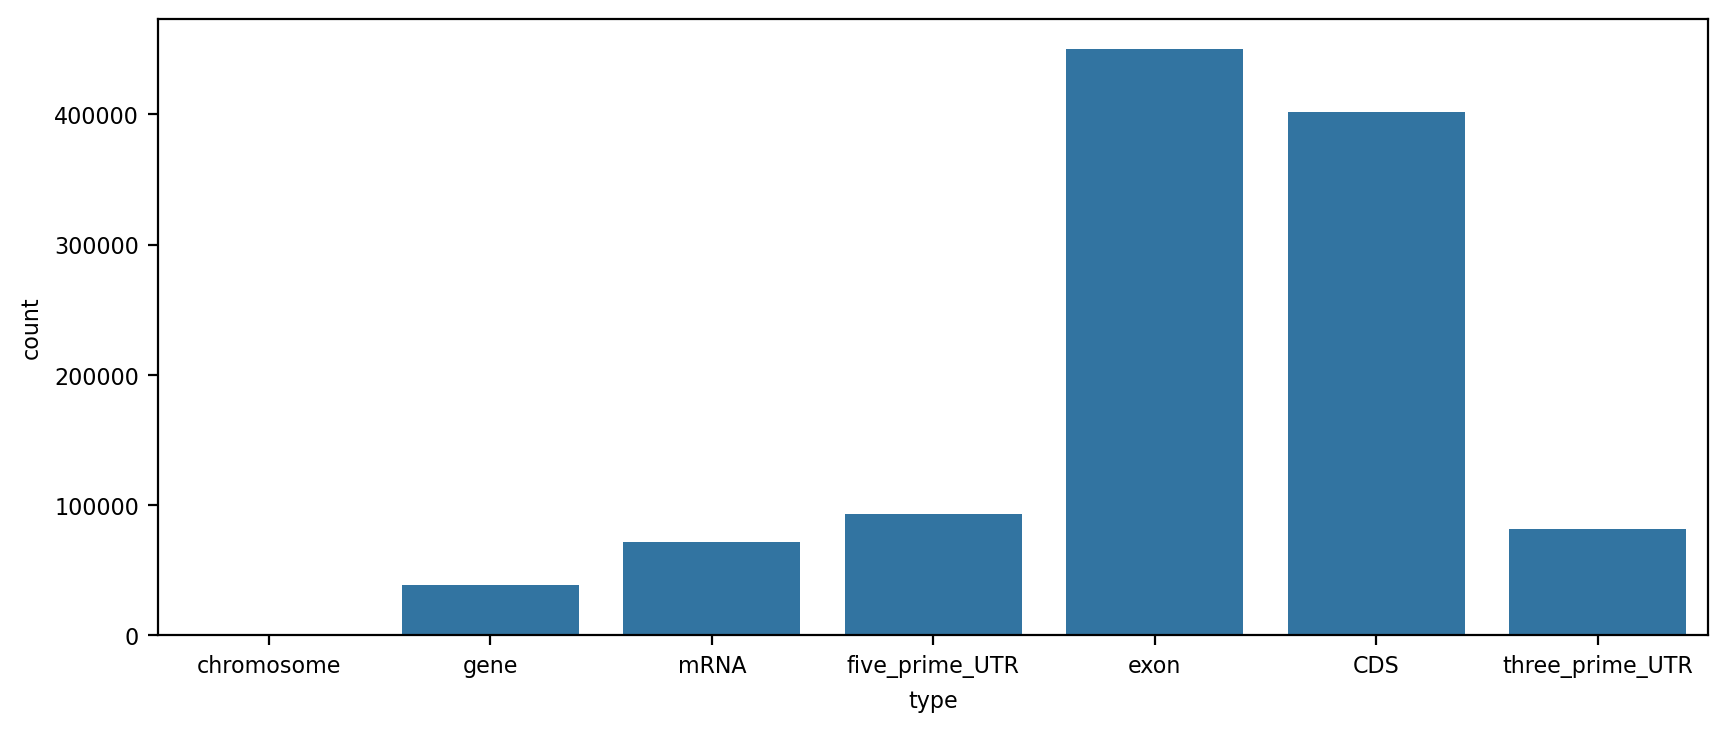

In [28]:
sns.countplot(data=chr_gff3_df, x='type');

Maybe we should look at single feature across the `seqid`

For `gene` features:



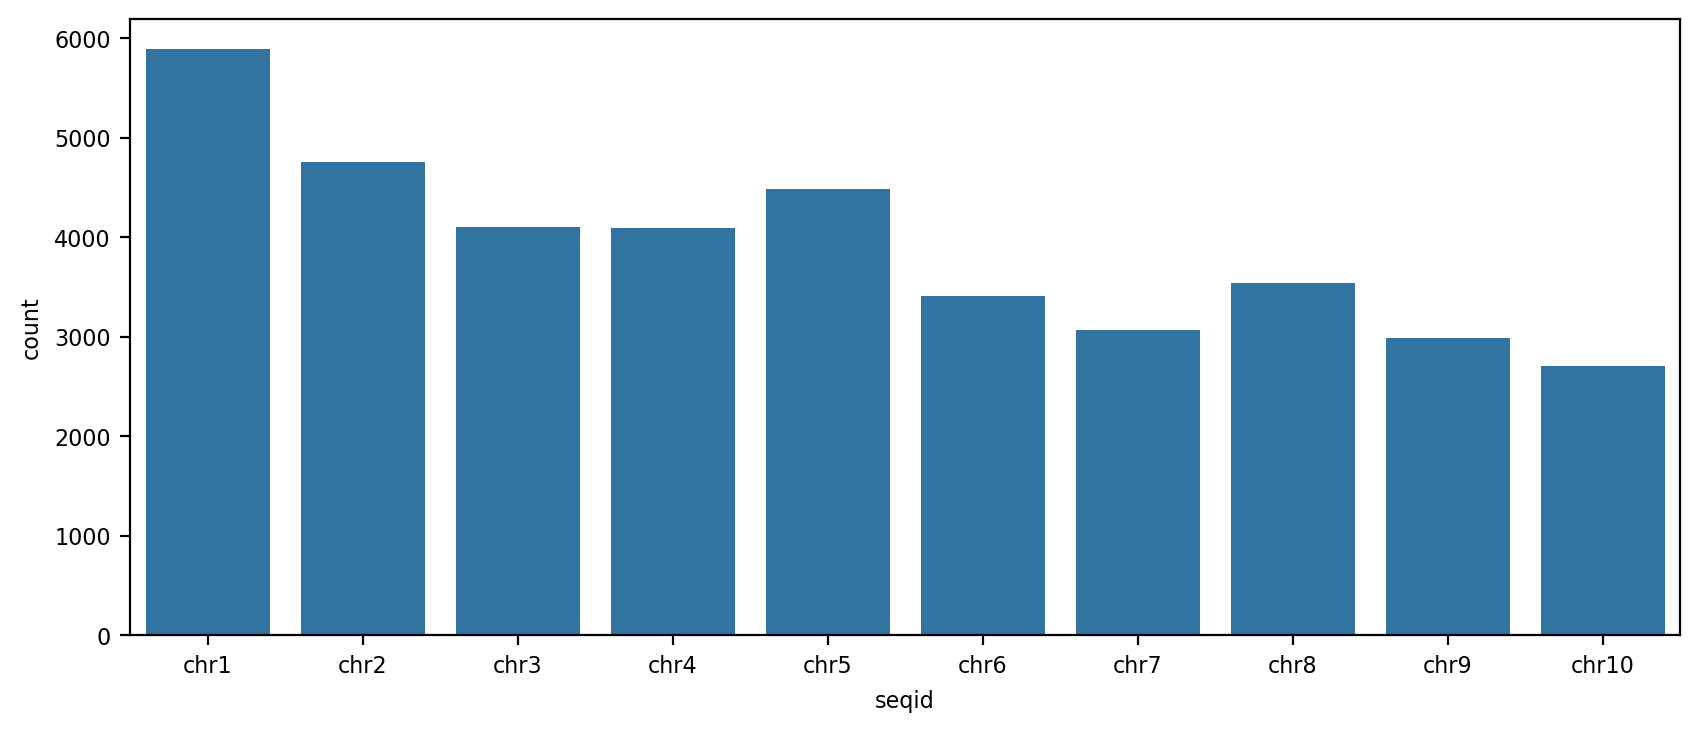

In [29]:
filter = chr_gff3_df['type'] == 'gene'
sns.countplot(data=chr_gff3_df[filter], x='seqid');

For `mRNA` features:

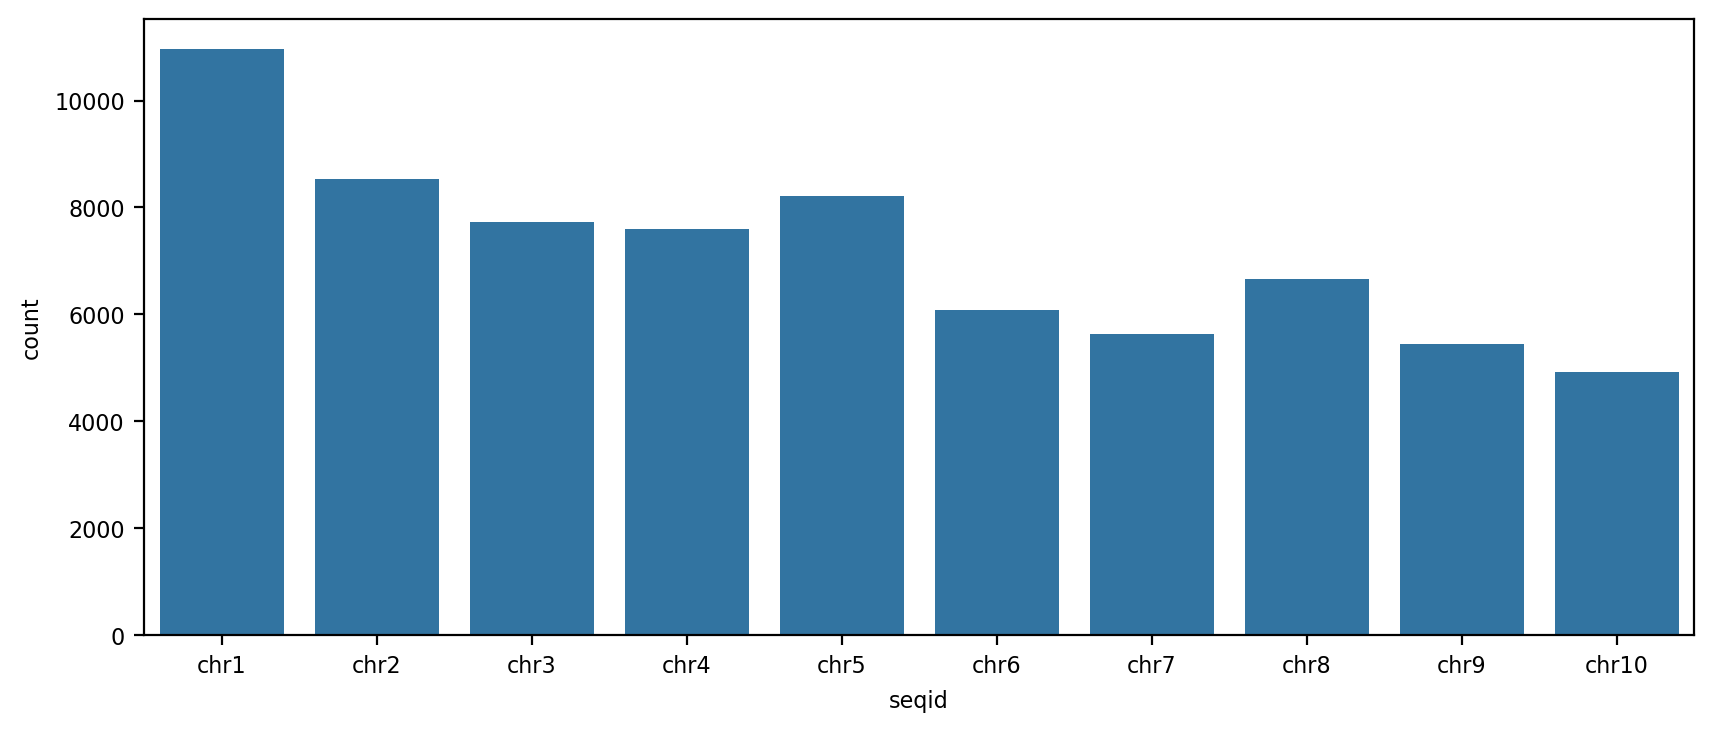

In [30]:
filter = chr_gff3_df['type'] == 'mRNA'
sns.countplot(data=chr_gff3_df[filter], x='seqid');

We also generate histograms to visualize the distribution of feature lengths.

Let's check the `CDS` feature length distribution.

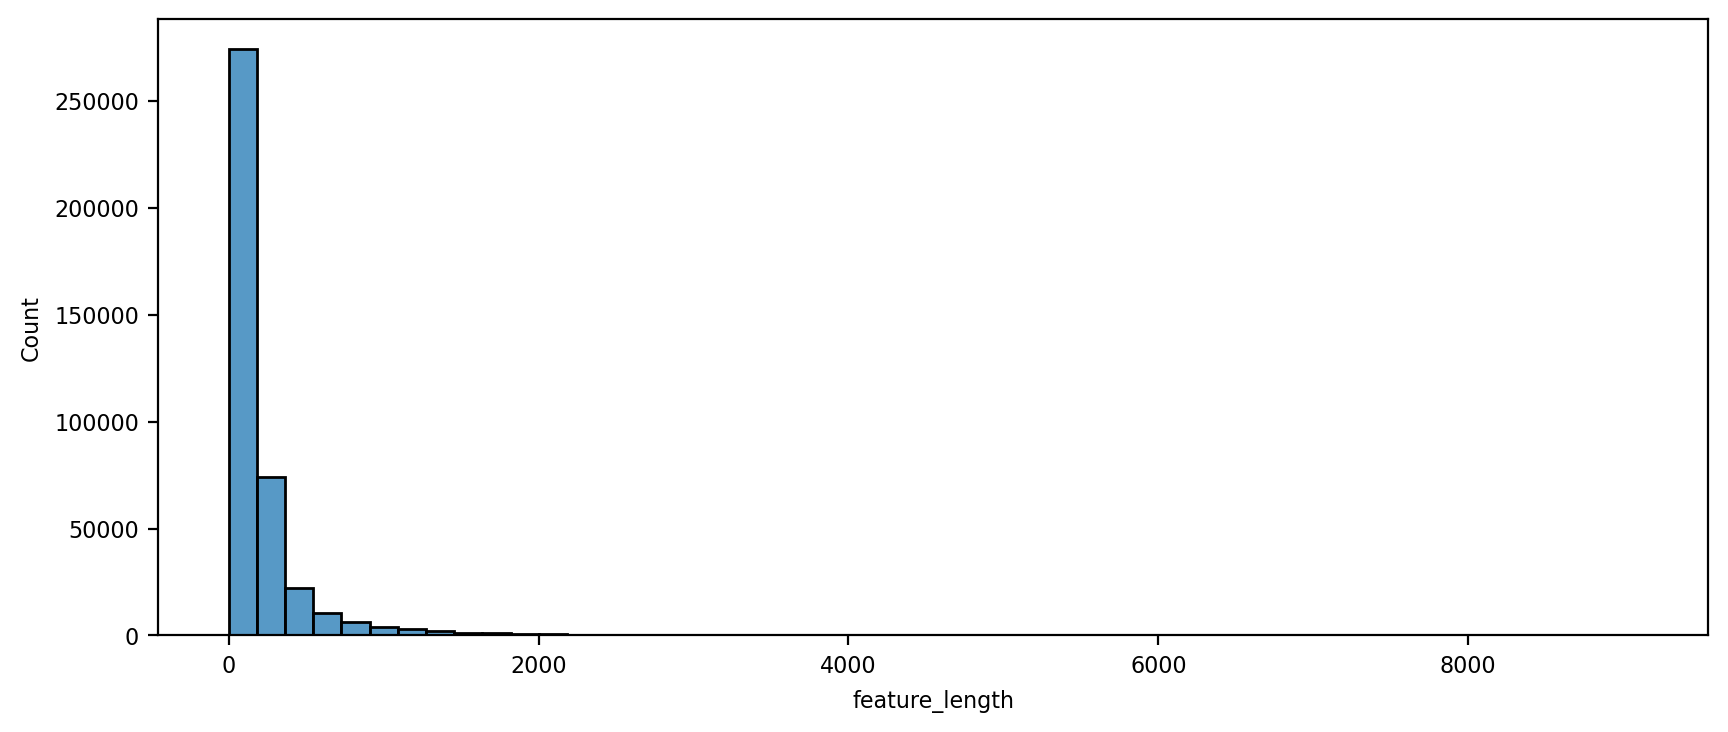

In [31]:
filter = chr_gff3_df['type'] == 'CDS'
sns.histplot(data=chr_gff3_df[filter], x='feature_length', bins=50);

To make the distribution more interpretable, we can use a log scale on the x-axis.


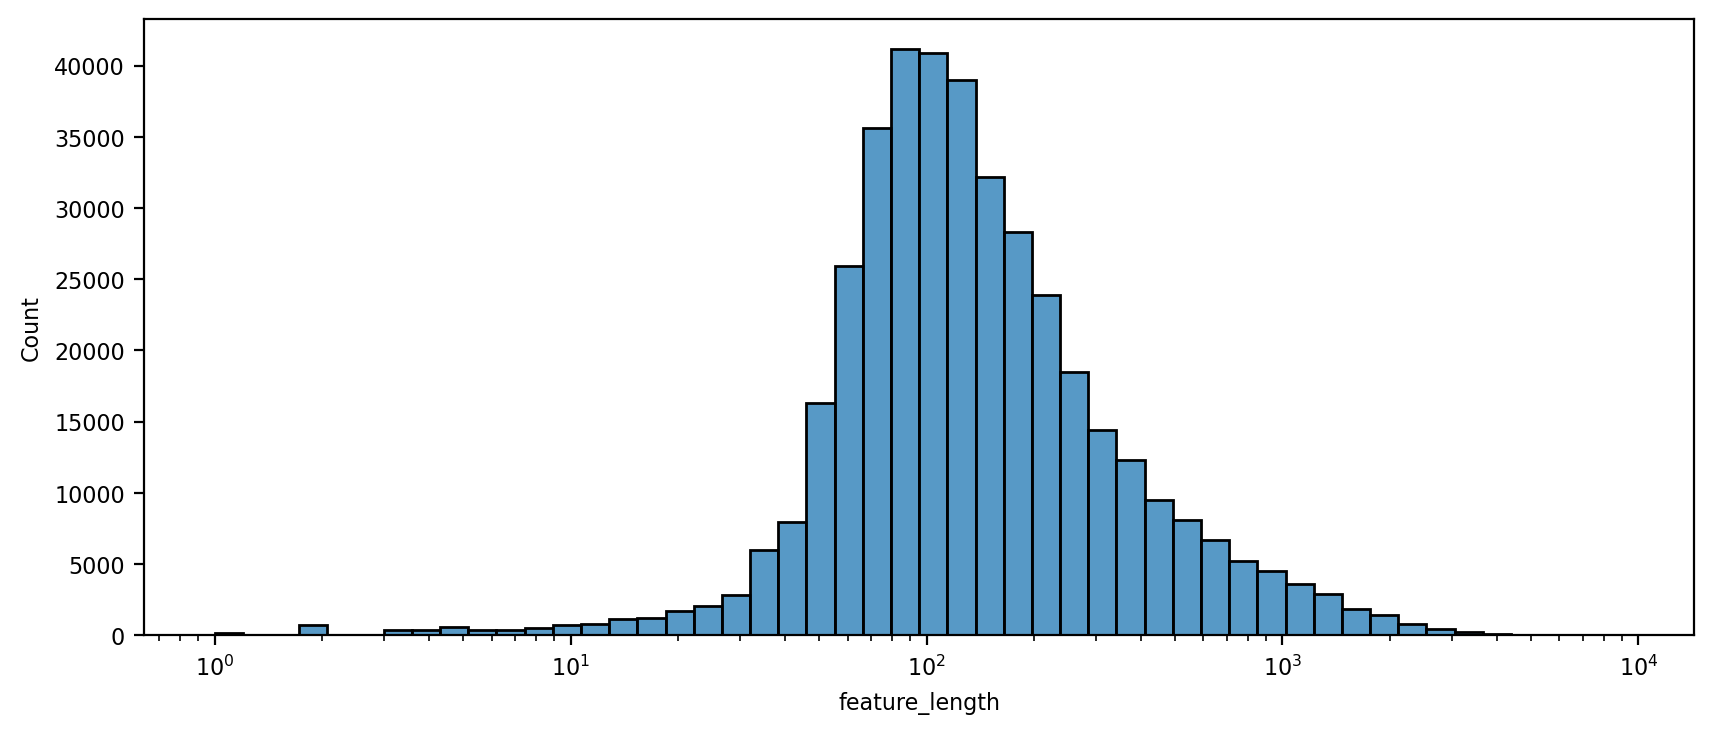

In [32]:
sns.histplot(data=chr_gff3_df[filter], x='feature_length', bins=50, log_scale=True);

you can adjust the bins for more granularity.


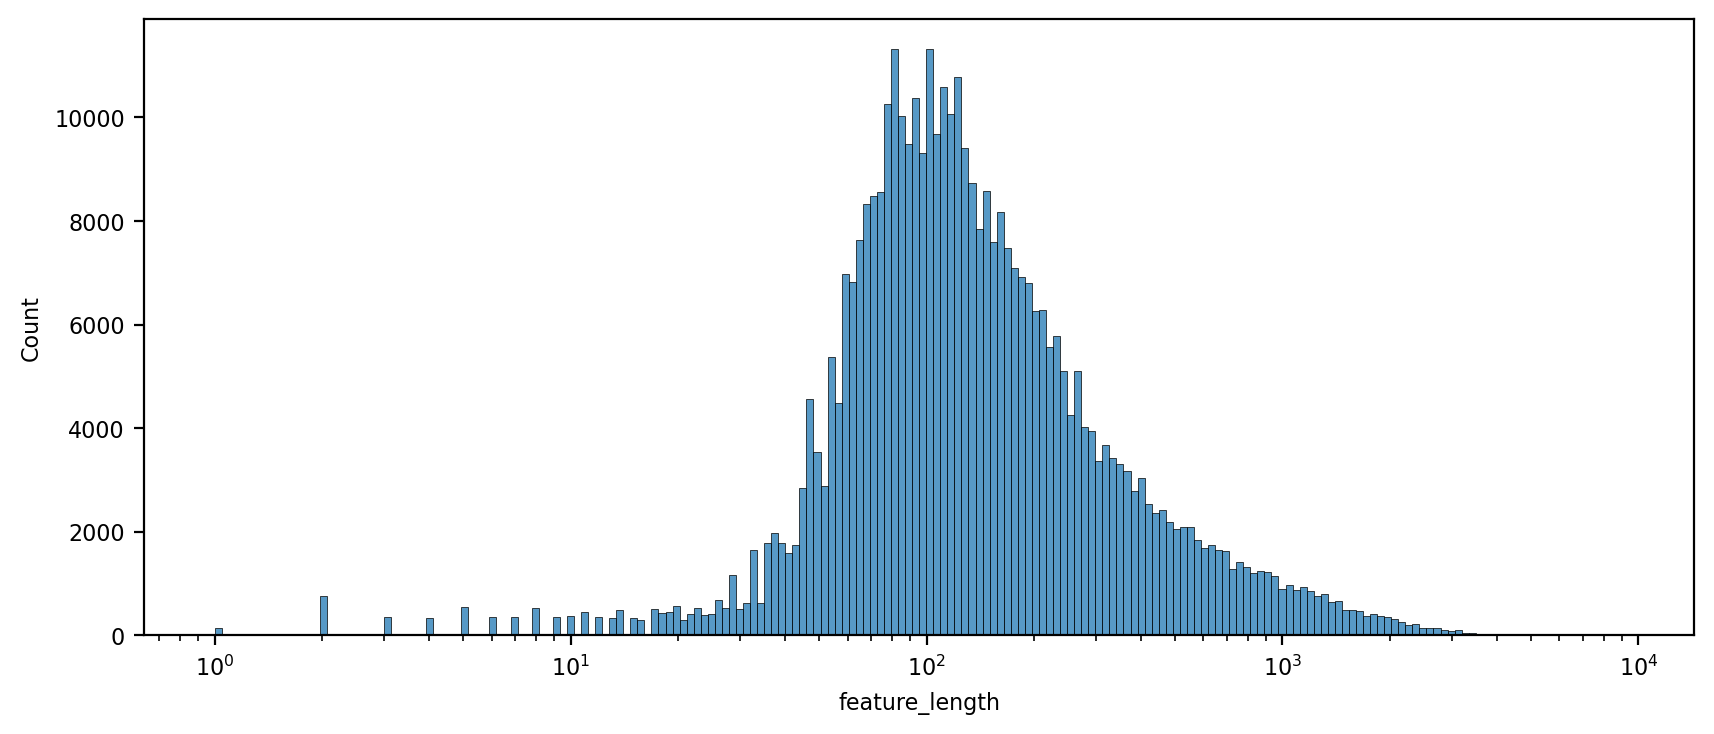

In [33]:
sns.histplot(data=chr_gff3_df[filter], x='feature_length', bins=200, log_scale=True);

or can also be plotted as a kernel density estimate plot.

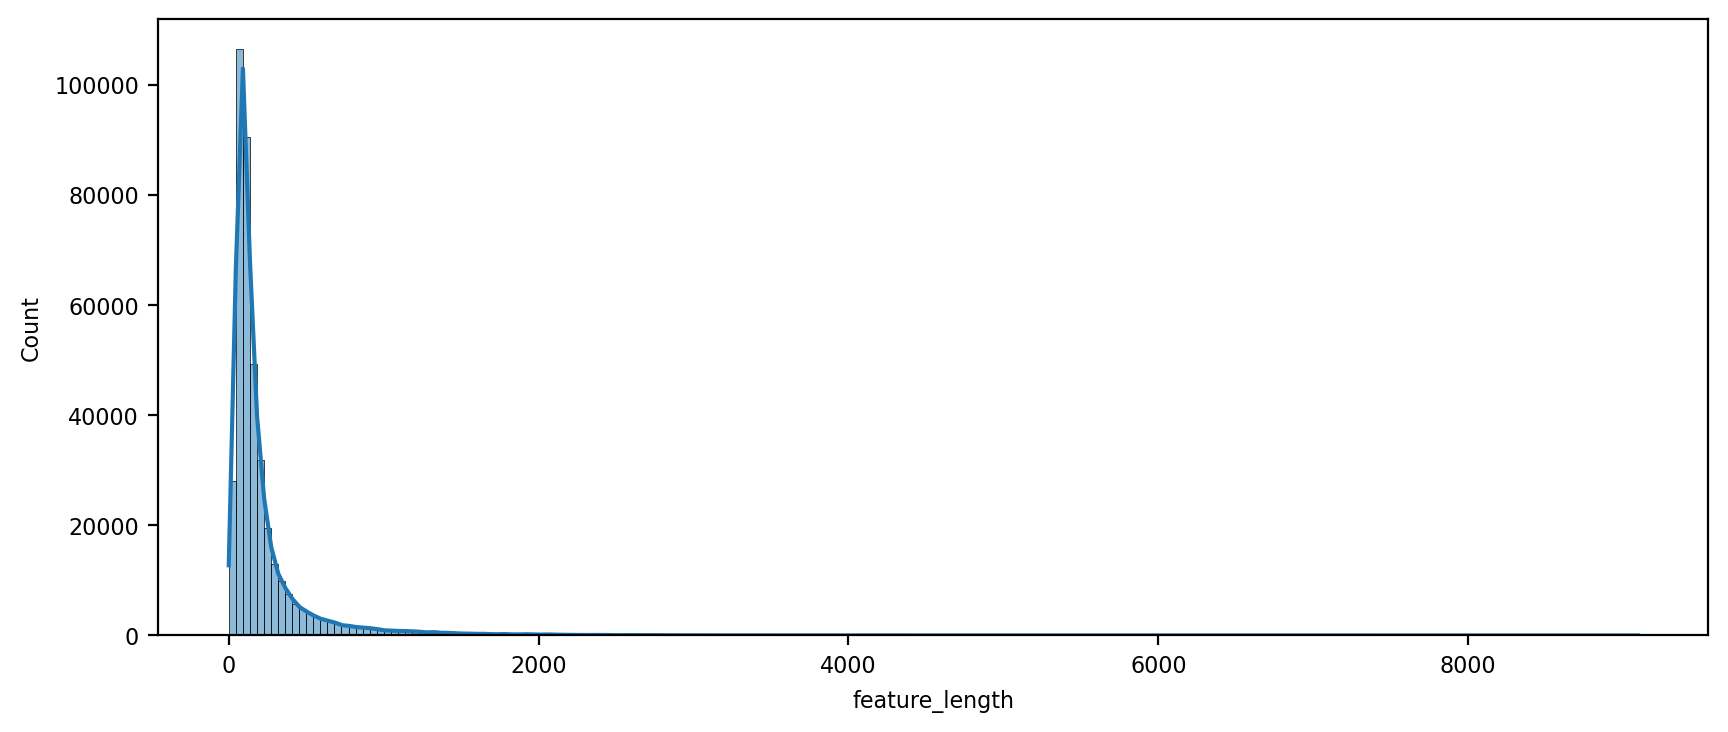

In [34]:
sns.histplot(data=chr_gff3_df[filter], x='feature_length', bins=200, kde=True);

Similarly, you can generate histograms for other features as well.

For `gene` features:


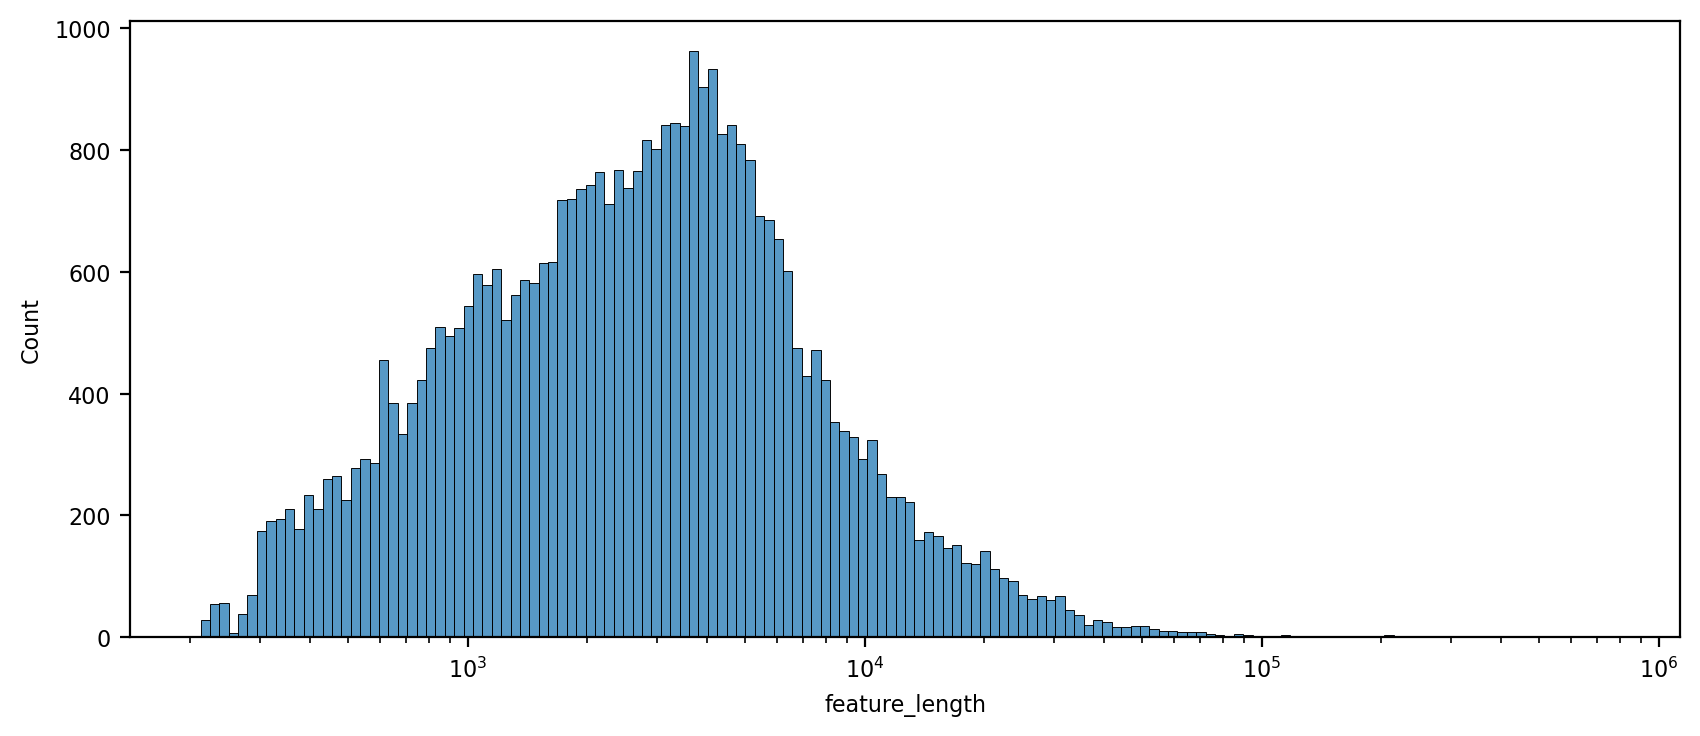

In [35]:
filter = chr_gff3_df['type'] == 'gene'
sns.histplot(data=chr_gff3_df[filter], x='feature_length', bins=150, log_scale=True);

To save plots, you can either use the `%%` magic command in Jupyter notebook or use the `savefig` method.


<Axes: xlabel='feature_length', ylabel='Count'>

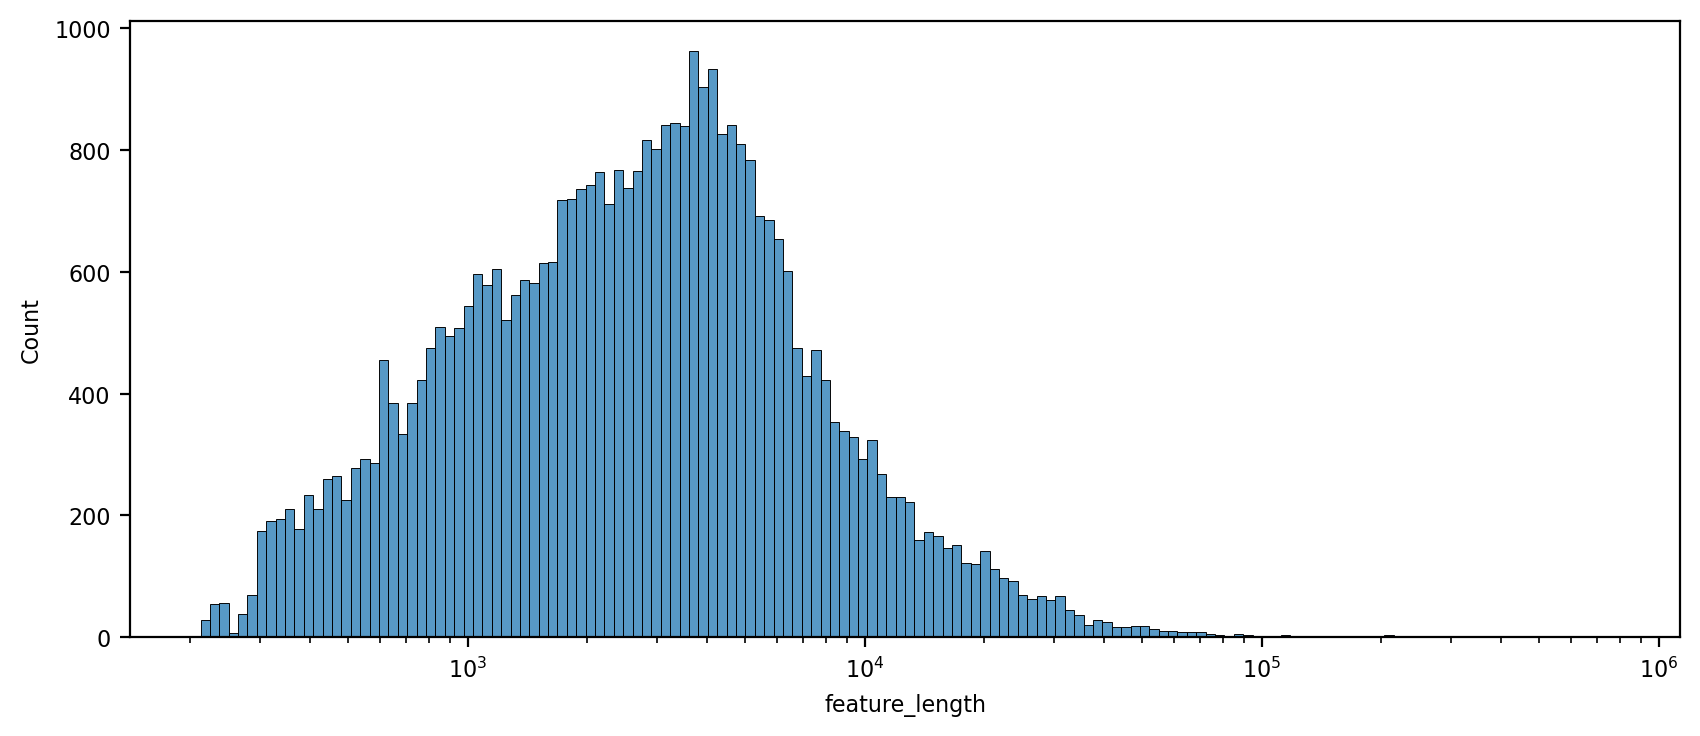

In [36]:
%%capture --no-display fig.png
sns.histplot(data=chr_gff3_df[filter], x='feature_length', bins=150, log_scale=True);

or

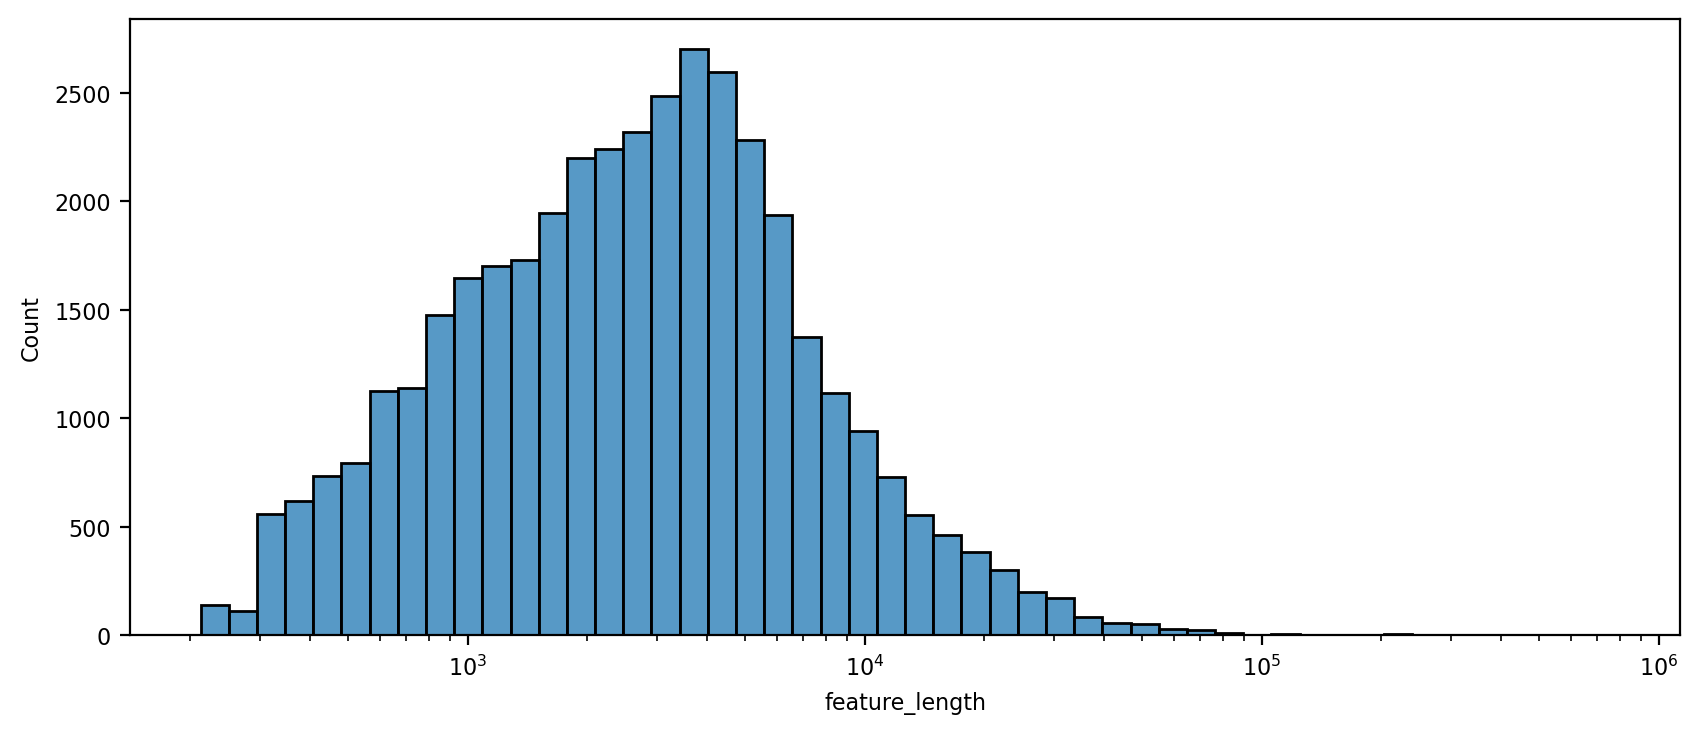

In [37]:
sns.histplot(data=chr_gff3_df[filter], x='feature_length', bins=50, log_scale=True)
plt.savefig('gene_feature_length_distribution.png');

## 6. Advanced filtering

Suppose you want to subset your GFF3 file to retain only primary transcripts. You can use the `attributes` column to filter the dataframe.


In [38]:
filter = chr_gff3_df['attributes'].str.contains('canonical_transcript')
chr_gff3_df[filter]

,seqid,source,type,start,end,score,strand,phase,attributes,feature_length
2,chr1,NAM,mRNA,34617,40204,.,+,.,ID=Zm00001eb000010_T001;Parent=Zm00001eb000010...,5587
85,chr1,NAM,mRNA,41214,46762,.,-,.,ID=Zm00001eb000020_T001;Parent=Zm00001eb000020...,5548
107,chr1,NAM,mRNA,108554,114382,.,-,.,ID=Zm00001eb000050_T001;Parent=Zm00001eb000050...,5828
124,chr1,NAM,mRNA,188559,189581,.,-,.,ID=Zm00001eb000060_T001;Parent=Zm00001eb000060...,1022
132,chr1,NAM,mRNA,190192,198832,.,-,.,ID=Zm00001eb000070_T001;Parent=Zm00001eb000070...,8640
...,...,...,...,...,...,...,...,...,...,...
1138073,chr10,NAM,mRNA,152010430,152012584,.,-,.,ID=Zm00001eb434550_T001;Parent=Zm00001eb434550...,2154
1138079,chr10,NAM,mRNA,152012893,152015823,.,-,.,ID=Zm00001eb434560_T001;Parent=Zm00001eb434560...,2930
1138095,chr10,NAM,mRNA,152200925,152201511,.,+,.,ID=Zm00001eb434570_T001;Parent=Zm00001eb434570...,586
1138101,chr10,NAM,mRNA,152280251,152282615,.,+,.,ID=Zm00001eb434580_T001;Parent=Zm00001eb434580...,2364


As you see, this will only fetch you `mRNA` features but not its child features like `CDS` or `exon`. If you want to fetch all the child features of the primary transcript, you can use the `mRNA_id` column to filter the dataframe.

In [39]:
mRNA_id = chr_gff3_df[filter]['attributes'].str.split(';', expand=True)[0].str.split('=', expand=True)[1]

This list of ids are the primary transcripts. You can use this list to filter the dataframe.

In [40]:
import re
# create a pattern to search for the IDs
pattern = re.compile('|'.join(mRNA_id))
# Define a function to check if a given attribute contains any of the IDs
def contains_id(attribute):
    return bool(pattern.search(attribute))
# Apply the function to each row in the DataFrame
primary_gff3_df = chr_gff3_df[chr_gff3_df['attributes'].apply(contains_id)]

## 7. Iterating over the dataframe

If you want to iterate over the dataframe, you can use the `iterrows` method.


This is useful when you want to perform some operation on each row of the dataframe.


Let's take just 250 lines for showing this example

In [41]:
chr_gff3_test = chr_gff3_df.head(250)

iterate over each lines in gff3, select only "mRNA" entries, and print selective fields in preferred format:

In [42]:
for index, row in chr_gff3_test.iterrows():
    if row['type'] == 'mRNA':
        position = f"{row['seqid']}:{row['start']}-{row['end']}"
        print(position)

chr1:34617-40204
chr1:41263-46050
chr1:41214-43902
chr1:41314-46039
chr1:41214-46762
chr1:108554-114382
chr1:188559-189581
chr1:190192-198832
chr1:200262-203393
chr1:206619-209723
chr1:246422-247242
chr1:315219-315846
chr1:325307-326897
chr1:328087-328525
chr1:550834-564766
chr1:551305-564761


iterate over each lines in gff3, select only "gene" entries, and print selective fields in preferred format:

In [43]:
for index, row in chr_gff3_test.iterrows():
    if row['type'] == 'gene':
        print(row['seqid'], row['type'], row['start'], row['end'])

chr1 gene 34617 40204
chr1 gene 41214 46762
chr1 gene 108554 114382
chr1 gene 188559 189581
chr1 gene 190192 198832
chr1 gene 200262 203393
chr1 gene 206619 209723
chr1 gene 246422 247242
chr1 gene 315219 315846
chr1 gene 325307 326897
chr1 gene 328087 328525
chr1 gene 550834 564766


This will print the genomic coordinates of all the genes in the GFF3 file.

The above filtering can also be done using `iterrows` method.

In [44]:
for index, row in chr_gff3_test.iterrows():
    if 'canonical_transcript' in row['attributes']:
        mRNAid = row['attributes'].split(';')[0].split('=')[1]
        print(mRNAid)

Zm00001eb000010_T001
Zm00001eb000020_T001
Zm00001eb000050_T001
Zm00001eb000060_T001
Zm00001eb000070_T001
Zm00001eb000080_T001
Zm00001eb000100_T001
Zm00001eb000110_T001
Zm00001eb000120_T001
Zm00001eb000140_T001
Zm00001eb000150_T001
Zm00001eb000170_T004


This will print the genomic coordinates of all the primary transcripts in the GFF3 file.

## Conclusion

In this short exercise, we learned how to read a GFF3 file using `pandas`, filter the data, convert the format, calculate summary statistics, and visualize the data. These are some of the common tasks you might encounter while working with GFF3 files.

`pandas` makes working with non-standardized file formats like GFF3 easy and efficient. It provides a powerful set of tools to manipulate and analyze the data.